# The Football Lab: Predicting Player Impact by Position

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sklearn 

In [2]:

raw_dataset_23 = pd.read_csv("datasets/2022-2023_Football_Player_Stats.csv", encoding="latin1")
raw_dataset_22 = pd.read_csv("datasets/2021-2022_Football_Player_Stats.csv", encoding="latin1")


## Cleaning & Structuring the Dataset

### Structuring the DataSet
Here in this section we're going to manipulate the dataset. The manipulation are made so it's easier to use it.     
Let's start adding a row with the name of all columns..

In [3]:
## Data Preprocessing
raw_dataset_22.loc[len(raw_dataset_22)] = raw_dataset_22.columns

raw_dataset_22 = raw_dataset_22.iloc[:,0].str.split(";", expand=True)
raw_dataset_22.columns =raw_dataset_22.iloc[len(raw_dataset_22)-1]

raw_dataset_22 = raw_dataset_22.drop(index =len(raw_dataset_22)-1)

raw_dataset_22.head()

2921,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22,2000,34,32,...,0.03,1.41,1.16,0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34,1987,34,34,...,0,0.06,1.39,0,0.03,0,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22,2000,31,29,...,0,0.36,1.24,0,0,0,8.76,0.88,0.88,50
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29,1993,34,34,...,0.03,0.79,2.23,0,0,0,8.87,0.43,0.43,50
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22,2000,1,1,...,0,2,0,0,0,0,4,2,0,100


In [4]:
## Data Preprocessing
raw_dataset_23.loc[len(raw_dataset_23)] = raw_dataset_23.columns

raw_dataset_23 = raw_dataset_23.iloc[:,0].str.split(";", expand=True)
raw_dataset_23.columns =raw_dataset_23.iloc[len(raw_dataset_23)-1]

raw_dataset_23 = raw_dataset_23.drop(index =len(raw_dataset_23)-1)

raw_dataset_23.head()

2689,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0,0,0,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0,0,0,6.64,2.18,1.23,64
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0,1.05,1.4,0,0,0,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0,0.35,0.8,0,0,0.05,6.6,0.5,0.5,50
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0,0.23,2.02,0,0,0,6.51,0.31,0.39,44.4


Here we are going to delete all the non common columns between the two datasets and the duplicated row.

In [5]:
common_columns = raw_dataset_23.columns.intersection(raw_dataset_22.columns)

raw_dataset_22 = raw_dataset_22[common_columns]
raw_dataset_23 = raw_dataset_23[common_columns]

# Remove duplicates from the dataset
raw_dataset_22 = raw_dataset_22[~raw_dataset_22['Player'].duplicated(keep=False)]

# Remove Javier Llabrés from the datasets because the row in dataset 2021-2022 is incompleted
raw_dataset_22 = raw_dataset_22[raw_dataset_22['Player'] != 'Javier Llabrés']
raw_dataset_23 = raw_dataset_23[raw_dataset_23['Player'] != 'Javier Llabrés']
raw_dataset_22 = raw_dataset_22[raw_dataset_22['Pos'] != 'GKMF']


In [6]:
columns_to_keep = ["Player", "Nation", "Pos", "Squad", "Comp", "Age", "Min", "MP", "SoT%", "PasTotCmp%", "Goals", "Assists", "TklWon" ,"Shots", "SoT", "ShoDist", "ShoPK", "PasTotCmp", "ScaSh", "GCA", "PKatt", "Touches", "PasTotDist", "PasAss", "CrsPA", "ScaPassLive", "Carries", "CarPrgDist", "PPA", "Tkl", "Int", "Clr","BlkSh", "TouDef3rd", "AerWon", "Err", "Fls", "PasLonCmp", "PasLonAtt", "PasDead", "CrdY", "CrdR", "Recov"]

columns_to_convert = ["Age", "Min", "MP", "SoT%", "PasTotCmp%", "Goals", "Assists", "TklWon" , "Shots", "SoT", "ShoDist", "ShoPK", "PasTotCmp", "ScaSh", "GCA", "PKatt", "Touches", "PasTotDist", "PasAss", "CrsPA", "ScaPassLive", "Carries", "CarPrgDist", "PPA", "Tkl", "Int", "Clr","BlkSh", "TouDef3rd", "AerWon", "Err", "Fls", "PasLonCmp", "PasLonAtt", "PasDead", "CrdY", "CrdR", "Recov"]

raw_dataset_22["Min"] = raw_dataset_22["Min"].apply(lambda col: pd.to_numeric(col, errors='coerce'))
raw_dataset_23["Min"] = raw_dataset_23["Min"].apply(lambda col: pd.to_numeric(col, errors='coerce'))

column_not_to_norm = ["Player", "Nation", "Pos", "Comp", "Age", "Min", "MP", "SoT%", "PasTotCmp%"]

dataset_22 = raw_dataset_22[columns_to_keep]
dataset_23 = raw_dataset_23[columns_to_keep]

for col in columns_to_convert:
    dataset_22.loc[:, col] = pd.to_numeric(dataset_22[col], errors='coerce')
    dataset_23.loc[:, col] = pd.to_numeric(dataset_23[col], errors='coerce')

In this section we are going to normalize certain columns for the season.

In [7]:
# here we are going to normalize all the columns as follows:
# value = value * Minutes Played / 90

columns_to_normalize = ["Goals", "Assists", "TklWon" ,"Shots", "SoT", "ShoDist", "ShoPK", "PasTotCmp", "ScaSh", "GCA", "PKatt", "Touches", "PasTotDist", "PasAss", "CrsPA", "ScaPassLive", "Carries", "CarPrgDist", "PPA", "Tkl", "Int", "Clr","BlkSh", "TouDef3rd", "AerWon", "Err", "Fls", "PasLonCmp", "PasLonAtt", "PasDead", "CrdR", "Recov"]


for index, line in dataset_22.iterrows():
    for column in columns_to_normalize:
        dataset_22.at[index, column] = round(dataset_22.at[index, column] * raw_dataset_22.at[index, "Min"] / 90, 0)



columns_to_normalize = [ "Assists", "TklWon" ,"Shots", "SoT", "ShoDist", "ShoPK", "PasTotCmp", "ScaSh", "GCA", "PKatt", "Touches", "PasTotDist", "PasAss", "CrsPA", "ScaPassLive", "Carries", "CarPrgDist", "PPA", "Tkl", "Int", "Clr","BlkSh", "TouDef3rd", "AerWon", "Err", "Fls", "PasLonCmp", "PasLonAtt", "PasDead", "CrdR", "Recov"]

for index, line in dataset_23.iterrows():
    for column in columns_to_normalize:
        dataset_23.at[index, column] = round(dataset_23.at[index, column] * raw_dataset_23.at[index, "Min"] / 90, 0)

dataset_22.head()

2921,Player,Nation,Pos,Squad,Comp,Age,Min,MP,SoT%,PasTotCmp%,...,TouDef3rd,AerWon,Err,Fls,PasLonCmp,PasLonAtt,PasDead,CrdY,CrdR,Recov
0,Max Aarons,ENG,DF,Norwich City,Premier League,22,2881,34,15.4,75.5,...,746.0,15.0,0.0,31.0,98.0,217.0,339.0,0.25,0.0,177.0
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34,2983,34,33.3,82.4,...,1087.0,67.0,0.0,43.0,187.0,303.0,100.0,0.15,1.0,224.0
2,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22,2462,31,27.8,91.7,...,621.0,24.0,0.0,45.0,184.0,214.0,20.0,0.44,3.0,240.0
3,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29,2956,34,23.3,81.6,...,450.0,14.0,0.0,46.0,205.0,308.0,28.0,0.27,0.0,291.0
4,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22,45,1,0.0,33.3,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0


In [8]:
dataset_23.head()

2689,Player,Nation,Pos,Squad,Comp,Age,Min,MP,SoT%,PasTotCmp%,...,TouDef3rd,AerWon,Err,Fls,PasLonCmp,PasLonAtt,PasDead,CrdY,CrdR,Recov
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,1596,20,18.5,74.9,...,77.0,6.0,1.0,11.0,16.0,42.0,51.0,0.11,0.0,86.0
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1980,22,5.3,81.5,...,605.0,48.0,1.0,29.0,83.0,154.0,82.0,0.09,0.0,146.0
2,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,770,14,33.3,80.8,...,98.0,8.0,0.0,15.0,38.0,51.0,10.0,0.12,0.0,70.0
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,1799,20,25.0,91.6,...,240.0,10.0,0.0,49.0,67.0,86.0,28.0,0.15,0.0,132.0
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1165,15,0.0,87.3,...,249.0,4.0,0.0,12.0,34.0,51.0,10.0,0.16,0.0,84.0


## Visualization part

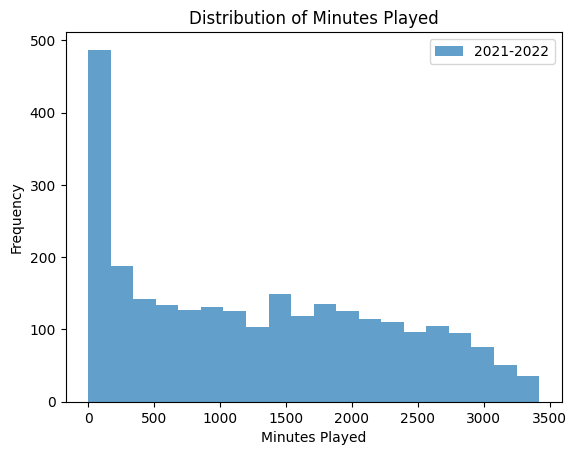

In [9]:
plt.hist(dataset_22["Min"], bins=20, alpha=0.7, label="2021-2022")
plt.xlabel("Minutes Played")
plt.ylabel("Frequency")
plt.title("Distribution of Minutes Played")
plt.legend()
plt.show()

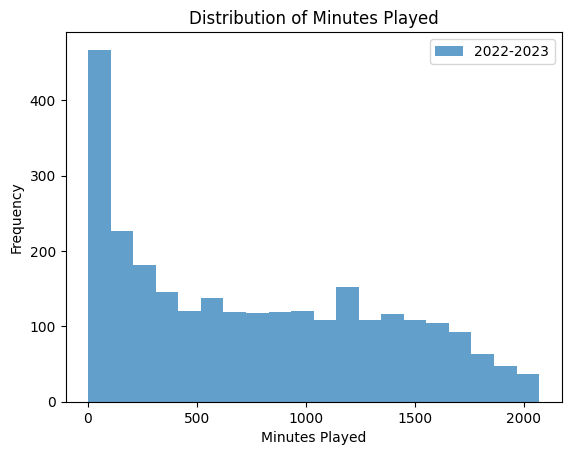

In [10]:
plt.hist(dataset_23["Min"], bins=20, alpha=0.7, label="2022-2023")
plt.xlabel("Minutes Played")
plt.ylabel("Frequency")
plt.title("Distribution of Minutes Played")
plt.legend()
plt.show()

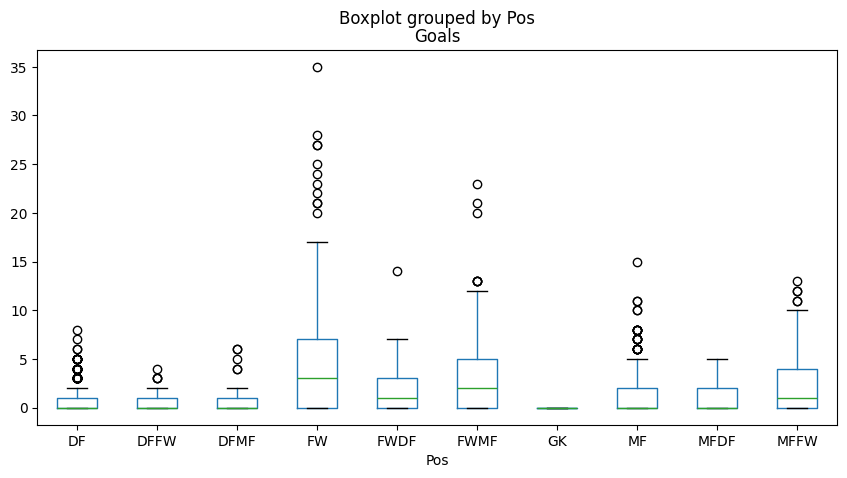

In [11]:
dataset_22.boxplot(column="Goals", by="Pos", grid=False, figsize=(10, 5))
plt.show()

# Boxplot del numero di gol di ogni giocatore nei vari campionati
## Nel grafico sottostante notiamo che 

- Il numero "tipico" di gol segnati per giocatore non varia drasticamente tra i campionati, questo perche le mediane delle box dei vari campionati   sono piuttosto simili tra di loro. 
Cio significa che la maggior parte dei calciatori dei top 5 campionati europei nella stagione 2021-2022 ha segnato piu o meno lo stesso numero di gol.

- Tutti e cinque i campionati presentano un numero considerevole di outlier verso l'alto, rappresentando giocatori che hanno segnato un numero significativamente maggiore di gol rispetto alla maggioranza.

- Pur avendo mediane simili, si nota una leggera differenza nella densità degli outlier nella parte superiore. Ad esempio, la Bundesliga sembra avere alcuni outlier particolarmente elevati. Tuttavia, la presenza di numerosi outlier in tutti i campionati indica che in ogni lega ci sono attaccanti molto prolifici.

- Non ci sono outlier significativi verso lo zero, il che è atteso dato che il numero di gol non può essere negativo.

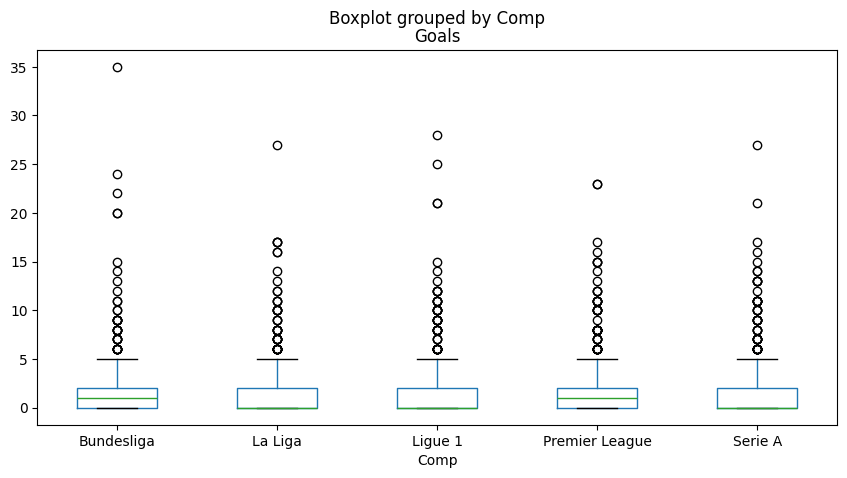

In [12]:
dataset_22.boxplot(column="Goals", by="Comp", grid=False, figsize=(10, 5))
plt.show()

## OLAP

In [30]:
dataset_22_OLAP = dataset_22


In [50]:
dataset_22_OLAP.loc[dataset_22_OLAP['Age'].between(16,21,'both'),'quantize_age'] = 'YOUNG'
dataset_22_OLAP.loc[dataset_22_OLAP['Age'].between(22,27,'both'),'quantize_age'] = 'PROMISE'
dataset_22_OLAP.loc[dataset_22_OLAP['Age'].between(28,33,'both'),'quantize_age'] = 'PRIME'
dataset_22_OLAP.loc[dataset_22_OLAP['Age'].between(34,41,'both'),'quantize_age'] = 'OLD'
quantize_age = ['YOUNG','PROMISE','PRIME','OLD']

#print(dataset_22_OLAP["quantize_age"])

quantize_comp = ["Bundesliga", "La Liga", "Ligue 1", "Premier League", "Serie A"]

#print(dataset_22_OLAP["Goals"].sort_values())

dataset_22_OLAP.loc[dataset_22_OLAP['Goals'].between(0,7.9,'both'),'quantize_goals'] = 'NOTHING'
dataset_22_OLAP.loc[dataset_22_OLAP['Goals'].between(8,15.9,'both'),'quantize_goals'] = 'SOLID'
dataset_22_OLAP.loc[dataset_22_OLAP['Goals'].between(16,23.9,'both'),'quantize_goals'] = 'GOOD'
dataset_22_OLAP.loc[dataset_22_OLAP['Goals'].between(24,35,'both'),'quantize_goals'] = 'EXCELLENT'
quantize_goals = ['NOTHING','SOLID','GOOD','EXCELLENT']


In [53]:
#codice qui

OLAP = np.zeros((4,4,5))
for z in range(0,len(quantize_comp)):
  Awards_prog_z = dataset_22_OLAP[dataset_22_OLAP['Comp'] == quantize_comp[z]]
  for j in range(0,len(quantize_age)):
    for i in range(0,len(quantize_goals)):
      OLAP[i,j,z] = np.sum((Awards_prog_z['quantize_goals'] == quantize_goals[i]) & (Awards_prog_z['quantize_age'] == quantize_age[j]))

In [54]:
#print(dataset_22_OLAP[dataset_22_OLAP['Comp'] == "Serie A"]["Goals"].sort_values(ascending=False))
print(dataset_22_OLAP["quantize_goals"])

0       NOTHING
1       NOTHING
2       NOTHING
3       NOTHING
4       NOTHING
         ...   
2916    NOTHING
2917    NOTHING
2918    NOTHING
2919    NOTHING
2920    NOTHING
Name: quantize_goals, Length: 2650, dtype: object


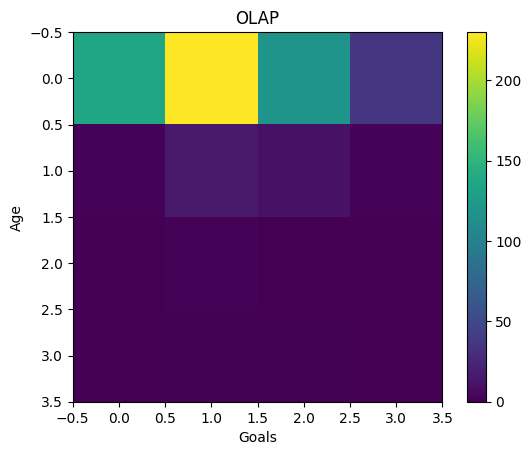

In [ ]:
slice_age = OLAP[:,:,:]

plt.ylabel('Age')
plt.xlabel('Goals')
plt.imshow(slice_age)
plt.colorbar()
plt.title('OLAP')
plt.show()